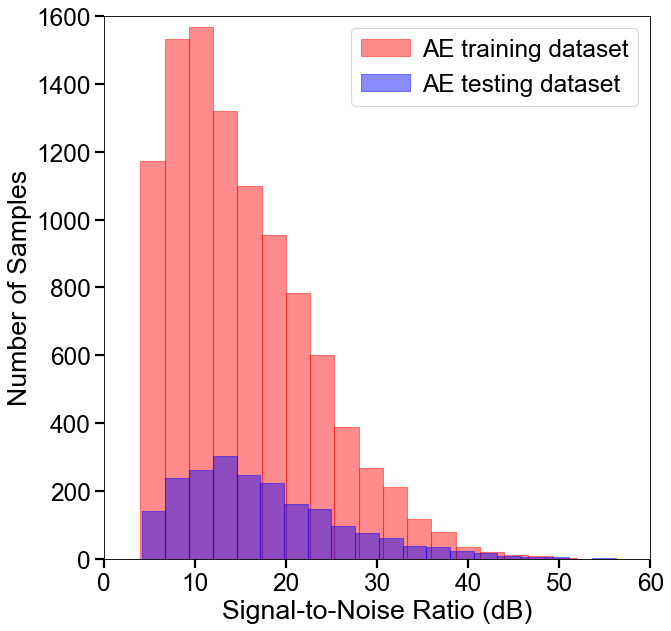

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import scipy.io as sio
import os
from matplotlib.pyplot import MultipleLocator 
# %matplotlib inline

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size']  = 8
plt.rcParams['xtick.minor.size']  = 4
plt.rcParams['ytick.major.size']  = 8
plt.rcParams['ytick.minor.size']  = 4

train_snr = pd.read_csv("train_snr.csv", header=None).values
train_mag = pd.read_csv("train_mag.csv", header=None).values

index=np.where(np.array(train_snr)<4.0)[0]
snrss=np.delete(train_snr,index)
magss=np.delete(train_mag,index)


test_snr = pd.read_csv("test_snr.csv", header=None).values
test_mag = pd.read_csv("test_mag.csv", header=None).values

index1=np.where(np.array(test_snr)<4.0)[0]
test_snr=np.delete(test_snr,index1)
test_mag=np.delete(test_mag,index1)


colors = ["#ff0000", "#0000ff", "w"]
fig, ax = plt.subplots(1, 1, figsize=(8.5,8), dpi=80)
l1=ax.hist(snrss, bins=18, color=colors[0],alpha=0.45, edgecolor="r")
# ax.hist(snrss, bins=18, ls="-", facecolor="None",edgecolor="w",lw=1.7)
l2=ax.hist(test_snr, bins=20, color=colors[1],alpha=0.45, edgecolor="#0000ff")
# ax.hist(test_snr, bins=18, ls="-", facecolor="None")
ax.tick_params(axis='both', labelsize=22)
ax.set_xlabel('Signal-to-Noise Ratio (dB)', fontsize=24)
ax.set_ylabel('Number of Samples', fontsize=24)
x_major_locator=MultipleLocator(10)
ax.xaxis.set_major_locator(x_major_locator)
plt.legend(["AE training dataset", "AE testing dataset"], fontsize=22, markerscale=1.8, handletextpad=0.5)
ax.set_ylim(0, 1600)
ax.set_xlim(0, 60)
plt.tight_layout()
plt.savefig("AE_dataset.png", dpi=300)

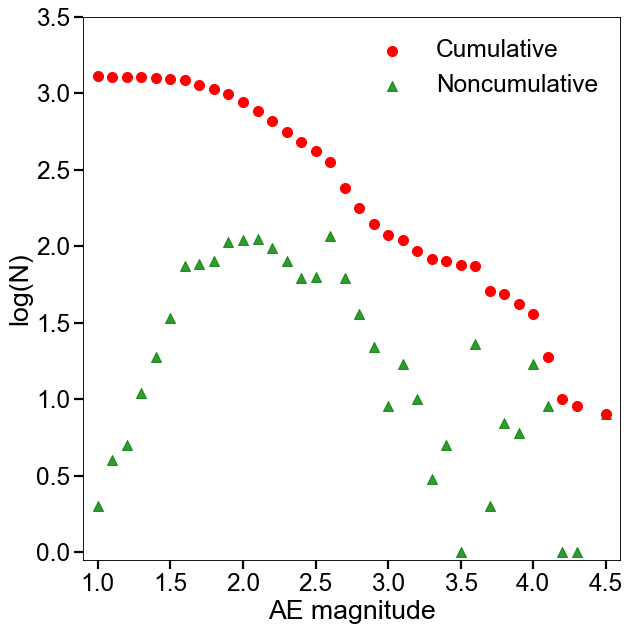

In [2]:
import numpy as np
import pandas as pd
import scipy.io as sio
import os
import csv
import torch 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import h5py 
from scipy import signal
from matplotlib.lines import Line2D
from matplotlib.pyplot import MultipleLocator 
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size']  = 8
plt.rcParams['xtick.minor.size']  = 4
plt.rcParams['ytick.major.size']  = 8
plt.rcParams['ytick.minor.size']  = 4

mag = sio.loadmat("taining_mag.mat")["mag"][0]

m_sum = np.around(mag,1)
acc_m={}
non_m={}
m_s = np.sort(m_sum)
n=0
toto_s=np.zeros((m_s.shape[0],2))
add_s=m_s[0]
toto_s[0,1]=add_s
toto_s[0,0]=m_s.shape[0]

for ind in range(m_s.shape[0]):
    if m_s[ind]!=add_s:
        n=n+1
        toto_s[n,0]=m_s.shape[0]-ind
        add_s=m_s[ind]
        toto_s[n,1]=add_s
toto_s=toto_s[toto_s.sum(axis=1)!=0,:]

mask_s=np.unique(m_s)
num_s=[]
for inx in mask_s:
    num_s.append(np.sum(m_s==inx))
num_s=np.array(num_s)
ms_s=np.column_stack((num_s,mask_s))

index1=np.where(m_s<2.0)      #震级小于1.5的索引
index1=np.array(index1)[0,:]   
m_sd1 = np.delete(m_s, index1, axis=0)  #删除震级小于1.5的索引
b1=(np.log10(np.e)/(np.mean(m_sd1)-2.0+0.05))
# erro1 = ((np.log10(np.e)/(np.mean(m_sd1)-1.5+0.05))/np.sqrt(m_sd1.shape[0]))

inx = np.where(toto_s[:,1]==2.0)[0][0]
start = toto_s[:,0][inx]
inx1 = np.where(toto_s[:,1]==4.5)[0][0]
end = toto_s[:,0][inx1]
b2=(np.log10(start)-np.log10(end))/(3.6-1.5)
erro2 = b2/(np.sqrt(m_sd1.shape[0])) 

fig, ax = plt.subplots(1, 1, figsize=(8.0,8), dpi=80)
lin2=ax.scatter(ms_s[:,1],np.log10(ms_s[:,0]), alpha=0.8, color="g", marker="^", s=80)
lin1=ax.scatter(toto_s[:,1],np.log10(toto_s[:,0]),alpha=1.0, color="r", marker="o", s=80)

ax.tick_params(axis='both', labelsize=22)
ax.set_xlabel('AE magnitude', fontsize=24)
ax.set_ylabel('log(N)', fontsize=24)
ax.set_xlim(0.9,4.6)
ax.set_ylim(-0.05,3.5)
y_major_locator=MultipleLocator(0.5)
ax.yaxis.set_major_locator(y_major_locator)
x_major_locator=MultipleLocator(0.5)
ax.xaxis.set_major_locator(x_major_locator)
# lin3=legend_element=[Line2D([1],[1],color="b",linestyle="dashed",lw=2, label="b = 0.97 ± 0.03")]
# ax.legend(loc=3, handles=legend_element, fontsize=22)
ax.legend([lin1,lin2], ['Cumulative', 'Noncumulative'], frameon=False, loc='upper right', scatterpoints=1, fontsize=22)
plt.tight_layout()
plt.savefig("train_N-M.png", dpi=300)

In [4]:
### 导出声发射事件数量
import numpy as np
import pandas as pd
import scipy.io as sio
import os
import csv
import torch 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import h5py 
from scipy import signal
from matplotlib.pyplot import MultipleLocator 
plt.rcParams['font.sans-serif'] = 'times new roman'
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size']  = 8
plt.rcParams['xtick.minor.size']  = 4
plt.rcParams['ytick.major.size']  = 8
plt.rcParams['ytick.minor.size']  = 4

def readcsv(filename):
    data=pd.read_csv(filename, header=None, encoding="utf-8").values
    index1=[]
    index2=[]
    for i in range(data.shape[0]):
        if data[i,1] < 20000:
            index1.append(i)
        if data[i,1] > 2980000:
            index1.append(i)
    idex = index1+index2
    data = np.delete(data, idex, axis=0)
    return data

toto = readcsv(r"ML_train.csv")
train = toto

train_snr = pd.read_csv("train_snr.csv", header=None).values
index=np.where(np.array(train_snr)<4)[0]
trains=np.delete(train,index,0)

paths = "train_events"
count = 0
while True:
    if trains[:,1].shape[0] <1:
        break
    
    phases = trains[0:12,1]
    phase=trains[0,1]
    inter =750
    count =count+1
    filename=str(count)+"_event.mat"
    pth = os.path.join(paths,filename).replace("\\", "/")
    
    index=np.where(np.abs(phase-phases)<inter)[0]
    event = trains[index,:]
    sio.savemat(pth, {"event":event})
    trains = np.delete(trains, index, 0)